# Project 11 : Mobility Hubs in 15 minutes

The **15-Minute City** rides on the concept of **“chrono-urbanism”**, which outlines that the quality of urban life is inversely proportional to the amount of time invested in transportation, more so through the use of automobiles. This concept originated from the first author, Carlos Moreno, who advocates for an urban set-up where locals are able to **access all of their basic essentials at distances that would not take them more than 15 min by foot or by bicycle**. <br>
For the present “15-minute” concept, Moreno supports that residents will be able to enjoy a higher quality of life where they will
be able to effectively fulfil **six essential urban social functions** to sustain a decent urban life.
Those include: 
- living, 
- working, 
- commerce, 
- healthcare, 
- education and 
- entertainment.

Four main dimensions:  
- **density** (people per kilometer square): optimal density that ultimately allows sustainability pursuits to be achieved on the economic, social and environmental frontiers. 
- **proximity** (both spatial and temporal): within the 15-min quickly accessible radial nodes, residents in a given neighborhood can readily access basic services. 
- **diversity**:  twofold: (i) the need for mixed use neighborhoods which are primary in providing a healthy mix of residential, commercial and entertainment components and (ii) diversity in culture and people.
- **digitalization**:  relevant in ensuring the actualization of the three other dimensions. <br><br>

The aim of this project is to propose a significant deployment of the mobility hubs in Louvain so as to ensure a maximum
coverage of the 15-minute measures. <br> 
The idea is to adopt a **Hybrid Deployment Strategy**:
- _Prioritize High-Density Zones_: <br>
Identify zones with higher population density and prioritize the deployment of mobility hubs in these areas. This ensures that a significant portion of the population benefits from reduced travel times.

- _Maximize Efficiency in Strategic Zones_: <br>
Within high-density zones, focus on strategic areas where essential functions (living, working, commerce, health care, education, and entertainment) converge. Deploy additional hubs to minimize travel time for residents accessing these crucial services.

- _Average Travel Time Optimization_: <br>
Extend the deployment to other zones, aiming for an average travel time across the city that is below the 15-minute threshold. This involves sacrificing travel time in some zones to enhance overall accessibility.


In [6]:
import geopandas as gpd
import folium
from shapely.geometry import Polygon, Point
import pandas as pd
import numpy as np 

In [4]:
# reading a file with the sectors (identified by parameter CODSEC) which has been officially used when collecting socio-economic data
zone = gpd.read_file('https://storageaccount11111111.blob.core.windows.net/container1/Leuven/socio_demographic_data/leuven_statsec.gpkg')
zone = zone.to_crs('epsg:4326')
zone.reset_index(inplace=True)

zone.head(3)

,index,UIDN,OIDN,CODSEC,NISCODE,SEC,SECNAAM,LENGTE,OPPERVL,STDEEL,geometry
0,0,19880,4074,24062A61-,24062,A61-,KAREELVELD,5896.98,1529378.12,LEUVEN NOORD,"MULTIPOLYGON (((4.68850 50.89458, 4.68895 50.8..."
1,1,20055,4078,24062B100,24062,B100,PUTKAPEL-CENTRUM,5277.17,980502.76,WILSELE WIJGMAAL,"MULTIPOLYGON (((4.72796 50.93378, 4.72742 50.9..."
2,2,20056,4087,24062B34-,24062,B34-,ROESELBERG,4205.81,643689.23,WILSELE WIJGMAAL,"MULTIPOLYGON (((4.69867 50.89670, 4.69866 50.8..."


In [337]:
# a folium map depicting the tessellation of Leuven based on socio-demographic zones 

# customised function for changing style in folium maps 
def style(fill_color, border_color, spessore_contorno=2, opacita=0.5):
    return {
        'fillColor': fill_color,
        'color': border_color,
        'weight': spessore_contorno,
        'fillOpacity': opacita
    }


m = folium.Map(location = (zone.unary_union.centroid.y, zone.unary_union.centroid.x), zoom_start = 12.5) # zone.unary_union.centroid punto centrale di tutta la città 
folium.GeoJson(zone, style_function = lambda x: style('purple', 'white', spessore_contorno = 0.6, opacita = 0.6)).add_to(m)
m

In [235]:
hubs = gpd.read_file('https://storageaccount11111111.blob.core.windows.net/container1/Leuven/hub_data_leuven/mobility_hubs.gpkg', crs={'init':'epsg:31370'})
hubs = hubs.to_crs(epsg=4326)

column_name_translations = {  #translating into english 
    'X': 'Longitude',
    'Y': 'Latitude',
    'nr': 'Number',
    'naam punt': 'Point Name',
    'Deelgemeente': 'Sub-municipality',
    'openbaar vervoer': 'Public Transport',
    'AWV': 'Roads and Traffic Agency',
    'OD of andere': 'Other',
    'Herkoms': 'Origin',
    'Interregionaal': 'Interregional',
    'Tijdstip lancering eHUB': 'eHUB Launch Time',
    'realistische timing': 'Realistic Timing',
    'publieke fietsenstalling': 'Public Bike Storage',
    'publieke parking': 'Public Parking',
    'Pakjesautomaat': 'Parcel Machine',
    'Blue Bike': 'Blue Bike',
    'aantal deelwagens': 'Number of Shared Cars',
    'aantal laadpalen': 'Number of Charging Stations',
    'aantal e-deelwagens': 'Number of Electric Shared Cars',
    'type zuil': 'Pillar Type',
    'aantal deelwagens (Uitbr 2020)': 'Number of Shared Cars (Expansion in 2020)',
    'aantal e-deelwagens (uitbr 2020)': 'Number of Electric Shared Cars (Expansion in 2020)',
    'aantal laadpalen (dossier 2020 - voorzien voor Q1 2021)': 'Number of Charging Stations (File 2020 - Planned for Q1 2021)',
    'aantal deelwagens (scenario2)': 'Number of Shared Cars (Scenario 2)',
    'aantal e-deelwagens (scenario2)': 'Number of Electric Shared Cars (Scenario 2)',
    'e-deelfietsen Sept (30)': 'E-bikes in September (30)',
    'e-deelfietsen Maart (35)': 'E-bikes in March (35)',
    'e-deelfietsen Mei (40)': 'E-bikes in May (40)',
    'e-deelfietsen Toekomst? (60)': 'E-bikes in the Future? (60)',
    'aantal deelfietsen': 'Number of Shared Bikes',
    'aantal e-deelfietsen (indien max 92 0)': 'Number of Electric Shared Bikes (if max 92 0)',
    'aantal e-deelfietsen (indien max 125)': 'Number of Electric Shared Bikes (if max 125)',
    'aantal e-deelfietsen (indien max 125) scenario 26 locaties': 'Number of Electric Shared Bikes (if max 125) scenario 26 locations',
    'aantal e-deelfietsen (indien max 125) scenario 31 locaties': 'Number of Electric Shared Bikes (if max 125) scenario 31 locations',
    'aantal e-deelbakfietsen': 'Number of Electric Cargo Bikes',
    'aantal pakjesautomaten': 'Number of Parcel Machines',
    '# fietsbeugels te voorzien': 'Number of Bike Racks to be Provided',
    'aantal e-hubs': 'Number of E-hubs',
    'EV capaciteit': 'Electric Vehicle Capacity',
    'stadsgezicht': 'Cityscape',
    'geometry': 'geometry'
}

hubs = hubs.rename(columns=column_name_translations)

for index, hub in hubs.iterrows():
    lon, lat = hub['Longitude'], hub['Latitude']

    feature1 = hub['Point Name']
    feature2 = f"Number of Shared Cars: {hub['Number']}"
    feature3 = f"Public Transport: {hub['Public Transport']}"
    feature4 = f"Number of Shared Bikes: {hub['Number of Shared Bikes']}"
    feature5 = f"Number of Electric Shared Cars: {hub['Number of Electric Shared Cars']}"
    feature6 = f"Number of Charging Stations: {hub['Number of Charging Stations']}"

    popup_text = f"<strong>{feature1}</strong><br>{feature2}<br>{feature3}<br>{feature4}<br>{feature5}<br>{feature6}"


    marker = folium.Marker(
        location=[lat, lon],
        popup=popup_text,
        icon=folium.Icon(color='darkpurple',icon = 'bell') # icon = user or star or bell or flag
    )


    marker.add_to(m)
m

## ISOCHRONE APPROACH: how far can we travel in 15 minutes? 

91719867


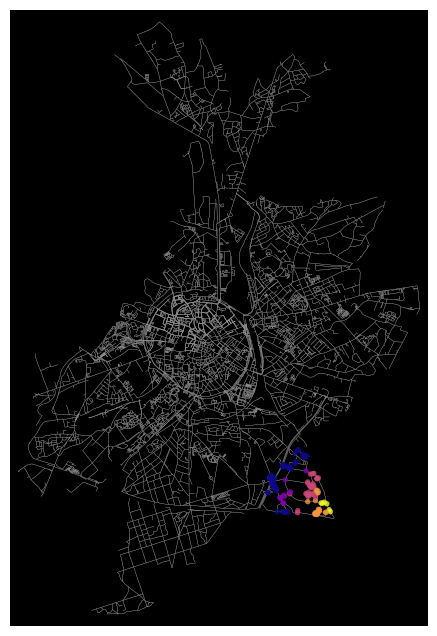

In [107]:
import osmnx as ox
import networkx as nx

# configure the place, network type, trip times, and travel speed
place = 'Leuven, Belgium'
network_type = 'walk'
trip_times = [5, 10, 15, 20, 25] #in minutes
travel_speed = 4.5 #walking speed in km/hour

# download the street network
G = ox.graph_from_place(place, network_type=network_type)

# find the centermost node and then project the graph to UTM
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes['geometry'].unary_union.centroid.xy
center_node = ox.nearest_nodes(G, y[0], x[0])
print(center_node)
G = ox.project_graph(G)

# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute

# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='plasma', start=0, return_hex=True)

# color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [15 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2,
                        bgcolor='k', edge_linewidth=0.2, edge_color='#999999')

## Attempt using mapboxOSRM

In [108]:
MY_MAPBOXOSRM_API_KEY = 'pk.eyJ1IjoidnBpYyIsImEiOiJjbHI3aXQ5Mm0yOWlkMmpudnBtNHJ5OGx0In0.yXnhEOyVnjz6nriA4GK2-g'

In [111]:
from routingpy.routers import MapboxOSRM

mb = MapboxOSRM(api_key = MY_MAPBOXOSRM_API_KEY)

In [112]:
zone.explore()

In [236]:
from pyproj import Proj, transform 

hubs_copia = hubs.copy()
hubs_copia.crs = 'EPSG:4326'
central_point_coords = zone.unary_union.centroid.x, zone.unary_union.centroid.y
central_point = Point(central_point_coords)

# converto il punto centrale nello stesso epsg 23029 che è quello del belgio (da epsg.io)
projector = Proj(init='epsg:4326'), Proj(init='epsg:23029')
central_point_x, central_point_y = transform(projector[0], projector[1], central_point_coords[0], central_point_coords[1])

central_point_df = gpd.GeoDataFrame(geometry=[Point(central_point_x, central_point_y)], crs='EPSG:23029')
hubs_copia = hubs_copia.to_crs('EPSG:23029')
hubs_copia['distance_to_central'] = hubs_copia.distance(central_point_df['geometry'].iloc[0])

closest_hub = hubs_copia.loc[hubs_copia['distance_to_central'].idxmin()]
print(closest_hub)
closest_hub_df = gpd.GeoDataFrame([closest_hub], geometry='geometry', crs='EPSG:23029')
closest_hub_df.to_crs('EPSG:4326')


Longitude                                                                                                 4.705406
Latitude                                                                                                 50.882424
Number                                                                                                           9
Point Name                                                                                        Sint-Maartensdal
Sub-municipality                                                                                               LEU
Public Transport                                                                                                 0
Roads and Traffic Agency                                                                                      None
Other                                                                                                         None
Origin                                                                          

,Longitude,Latitude,Number,Point Name,Sub-municipality,Public Transport,Roads and Traffic Agency,Other,Origin,Interregional,...,Number of Electric Shared Bikes (if max 125) scenario 26 locations,Number of Electric Shared Bikes (if max 125) scenario 31 locations,Number of Electric Cargo Bikes,Number of Parcel Machines,Number of Bike Racks to be Provided,Number of E-hubs,Electric Vehicle Capacity,Cityscape,geometry,distance_to_central
8,4.705406,50.882424,9,Sint-Maartensdal,LEU,0,None,None,S,B,...,NaN,4.0,1.0,K,1.0,0.0,0.0,0,POINT (4.70541 50.88242),41.39433


In [237]:

def mb_isochrone(gdf, time, profile = "driving"):

    # Grab X and Y values in 4326
    gdf['LON_VALUE'] = gdf.to_crs(4326).geometry.x
    gdf['LAT_VALUE'] = gdf.to_crs(4326).geometry.y

    coordinates = gdf[['LON_VALUE', 'LAT_VALUE']].values.tolist()

    # Build a list of shapes
    isochrone_shapes = []

    if type(time) is not list:
        time = [time]

    # Use minutes as input, but the API requires seconds
    time_seconds = [60 * x for x in time]

    # Given the way that routingpy works, we need to iterate through the list of 
    # coordinate pairs, then iterate through the object returned and extract the 
    # isochrone geometries.  
    for c in coordinates:
        iso_request = mb.isochrones(locations = c, profile = profile,
                                    intervals = time_seconds, polygons = "true")

        for i in iso_request:
            iso_geom = Polygon(i.geometry[0])
            isochrone_shapes.append(iso_geom)

    # Here, we re-build the dataset but with isochrone geometries
    df_values = gdf.drop(columns = ['geometry', 'LON_VALUE', 'LAT_VALUE'])

    time_col = time * len(df_values)

    # We'll need to repeat the dataframe to account for multiple time intervals
    df_values_rep = pd.DataFrame(np.repeat(df_values.values, len(time_seconds), axis = 0))
    df_values_rep.columns = df_values.columns

    isochrone_gdf = gpd.GeoDataFrame(
        data = df_values_rep,
        geometry = isochrone_shapes,
        crs = 4326
    )

    isochrone_gdf['time'] = time_col

    # We are sorting the dataframe in descending order of time to improve visualization
    # (the smallest isochrones should go on top, which means they are plotted last)
    isochrone_gdf = isochrone_gdf.sort_values('time', ascending = False)

    return(isochrone_gdf)

In [348]:
isocrone_walking = mb_isochrone(closest_hub_df, time = [5, 10,15], 
                            profile = "walking")

n = folium.Map(location = (central_point_coords[1], central_point_coords[0]), zoom_start = 12.5) 
folium.GeoJson(isocrone_walking, style_function = lambda x: style('#6f00ff', 'black', spessore_contorno = 1, opacita = 0.4)).add_to(n)
folium.Marker(
        location=[float(closest_hub_df.loc[:,'LAT_VALUE']), float(closest_hub_df.loc[:, 'LON_VALUE'])],
        icon=folium.Icon(color='darkpurple', icon = 'user') # icon = user or star or bell or flag
    ).add_to(n)


In [349]:
isocrone_bike = mb_isochrone(closest_hub_df, time = [5, 10,15], 
                            profile = "cycling")

bike_map = folium.Map(location = (central_point_coords[1], central_point_coords[0]), zoom_start = 12.5) 
folium.GeoJson(isocrone_bike, style_function = lambda x: style('#6f00ff', 'black', spessore_contorno = 1, opacita = 0.4)).add_to(bike_map)
folium.Marker(
        location=[float(closest_hub_df.loc[:,'LAT_VALUE']), float(closest_hub_df.loc[:, 'LON_VALUE'])],
        icon=folium.Icon(color='darkpurple', icon = 'user') # icon = user or star or bell or flag
    ).add_to(bike_map)


In [350]:
from IPython.display import display, HTML

n.get_root().html.add_child(folium.Element("""
                                    <h3 align="center" style="font-size:16px"><b>Walking isochrones</b></h3>
                                    """)
                                    )
bike_map.get_root().html.add_child(folium.Element("""
                                    <h3 align="center" style="font-size:16px"><b>Cycling isochrones</b></h3>
                                    """)
                                    )

display(HTML(f'<div style="display:flex">{n._repr_html_()} {bike_map._repr_html_()}</div>'))

In [ ]:
import folium
from folium.plugins import MeasureControl, MiniMap

def create_isochrone_layer(profile, time, color, icon):
    isochrone = mb_isochrone(closest_hub_df, time=time, profile=profile)
    
    layer = folium.FeatureGroup(name=f'Isochrones for {profile.capitalize()}')
    folium.GeoJson(isochrone, style_function=lambda x: style(color, 'black', weight=1, opacity=0.4)).add_to(layer)
    
    folium.Marker(
        location=[float(closest_hub_df.loc[:, 'LAT_VALUE']), float(closest_hub_df.loc[:, 'LON_VALUE'])],
        icon=folium.Icon(color='darkpurple', icon=icon)  # icon = user or star or bell or flag
    ).add_to(layer)
    
    return layer

main_map = folium.Map(location = (central_point_coords[1], central_point_coords[0]), tiles = 'cartodbdark_matter',zoom_start=12.5)

# isochrone layers for walking and cycling
walking_layer = create_isochrone_layer(profile='walking', time=[5, 10, 15], color='blue')
cycling_layer = create_isochrone_layer(profile='cycling', time=[5, 10, 15], color='yellow')

main_map.add_child(cycling_layer)
main_map.add_child(walking_layer)

MeasureControl(primary_length_unit='kilometers').add_to(main_map)
MiniMap(toggle_display=True).add_to(main_map)
folium.LayerControl().add_to(main_map)

display(main_map)
